for the sake of faster uploads, environments should be zipped up!
the original environment file was almost 0.9gb, so that would take a while to upload. Definitely can consider uploading the full thing once we're done working on a notebook.

In [13]:
import dill
dill.load_session('saved_notebook_env/neural_network.db')

In [17]:
from _Setup import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics



In [18]:
train_data = pd.read_csv(missForestTrainFile)
test_data = pd.read_csv(missForestTestFile)

x_train = train_data.drop(columns = ['Unnamed: 0','SepsisLabel'])
y_train = train_data['SepsisLabel']
test_data = test_data.drop(columns = ['Unnamed: 0'])

In [3]:
#model = tf.keras.models.load_model('nn_regularized.keras')
#model.summary()

# Old models.

In [ ]:
model = Sequential()
model.add(Dense(35, activation = "relu"))
model.add(Dense(20, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(10, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [16]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=64, epochs = 25)

Epoch 1/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.7644 - loss: 4.5084
Epoch 2/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.7941 - loss: 0.4966
Epoch 3/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8007 - loss: 0.4772
Epoch 4/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8037 - loss: 0.4676
Epoch 5/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8052 - loss: 0.4608
Epoch 6/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8056 - loss: 0.4593
Epoch 7/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.8064 - loss: 0.4567
Epoch 8/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.8067 - loss: 0.4555
Epoch 9/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8062 - loss: 0.4553
Epoch 10/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8065 - loss: 0.4539
Epoch 11/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8070 - loss: 0.45

In [19]:
#test_data = test_data.drop(columns = ['Unnamed: 0'])
predictions = model.predict(test_data)
train_predictions = model.predict(x_train)
#binary_predictions = np.where(predictions > 0.5, 1, 0)


14512/14512 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
43411/43411 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step


In [37]:
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
submission_file.to_csv('neural_submission_test.csv', index = False)
model.save('nn_regularized.keras')

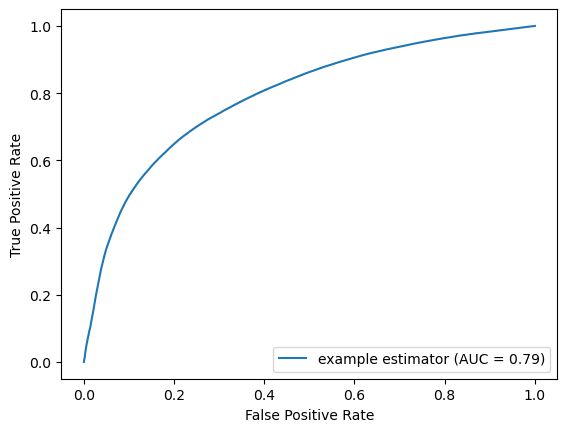

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

# These are working models, in progress.

In [30]:
model = Sequential()
model.add(Dense(30, activation = "relu" ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(25, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(20, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(4, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7077 - loss: 0.5896
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8054 - loss: 0.4716
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8073 - loss: 0.4532
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8074 - loss: 0.4496
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8081 - loss: 0.4480
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8075 - loss: 0.4467
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8084 - loss: 0.4429
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8084 - loss: 0.4410
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8090 - loss: 0.4393
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8090 - loss: 0.4392
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8093 - loss: 0.4378
Epoch 12/100
1352/1

In [33]:
predictions = model.predict(test_data)
train_predictions = model.predict(x_train)


14512/14512 ━━━━━━━━━━━━━━━━━━━━ 11s 736us/step
43411/43411 ━━━━━━━━━━━━━━━━━━━━ 31s 708us/step


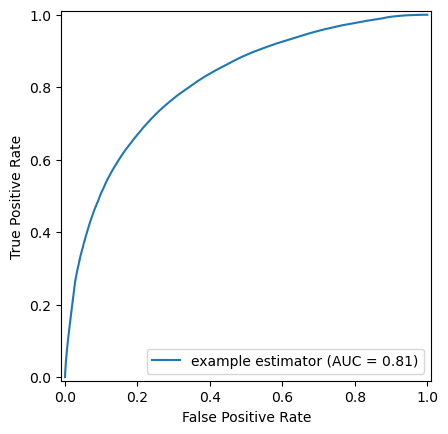

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [35]:
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
submission_file.to_csv('model_outputs/neural_submission_test.csv', index = False)

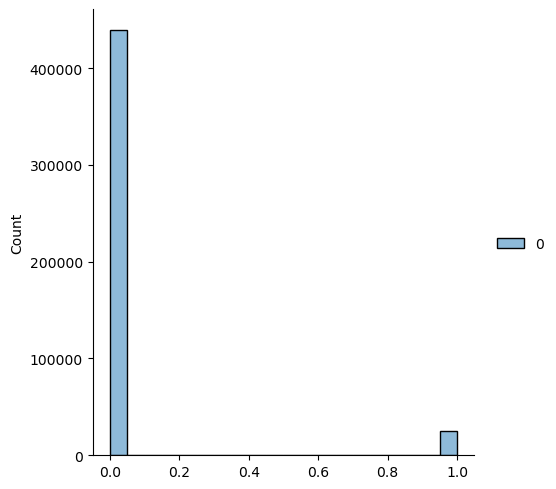

In [43]:
sns.displot(binary_predictions)

In [44]:
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.89   1068575
         1.0       0.68      0.36      0.47    320572

    accuracy                           0.81   1389147
   macro avg       0.76      0.66      0.68   1389147
weighted avg       0.80      0.81      0.79   1389147

F1 Score (Training): 0.47398650646234025


In [40]:
model = Sequential()
model.add(Dense(35, activation = "relu" ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7085 - loss: 0.6010
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7741 - loss: 0.5177
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7904 - loss: 0.4749
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7946 - loss: 0.4720
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7973 - loss: 0.4687
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7963 - loss: 0.4685
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7979 - loss: 0.4663
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7980 - loss: 0.4660
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7988 - loss: 0.4645
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7988 - loss: 0.4648
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7977 - loss: 0.4650
Epoch 12/100
1352/1

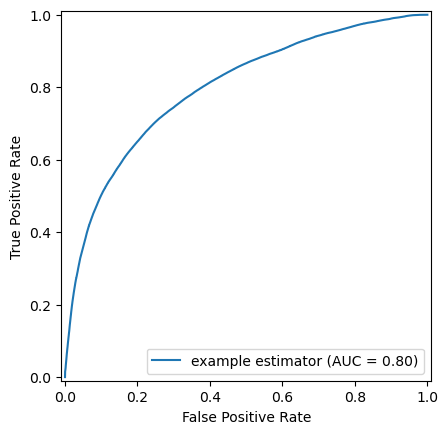

In [42]:
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)

In [66]:
predictions = model.predict(test_data)
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
#submission_file.to_csv('neural_submission_test.csv', index = False)

14512/14512 ━━━━━━━━━━━━━━━━━━━━ 12s 844us/step


# Trying out different dropout rates

In [61]:
submission_file

,ID,SepsisLabel
0,6560_1,0
1,6560_2,0
2,6560_3,0
3,6560_4,0
4,6560_5,0
...,...,...
464349,5630_16,0
464350,5630_17,0
464351,5630_18,0
464352,5630_19,0


In [ ]:
submission_file[['patient_id', 'time']] = submission_file['ID'].str.split('_', expand=True)
submission_file['time'] = submission_file['time'].astype(int)


# Apply the rule: if there's a 1 at any time point, set all later values to 1 for that patient
submission_file['SepsisLabel'] = submission_file.groupby('patient_id')['SepsisLabel'].transform(lambda x: x.cumsum().clip(upper=1))

# Combine patient ID and time back into a single column if needed
submission_file['patient_time'] = submission_file['patient_id'] + '_' + submission_file['time'].astype(str)
submission_file = submission_file[['ID','SepsisLabel']]


In [68]:
submission_file.iloc[6381:6391]

,ID,SepsisLabel
6381,697_43,0
6382,697_44,0
6383,697_45,0
6384,697_46,1
6385,697_47,1
6386,697_48,1
6387,697_49,1
6388,697_50,1
6389,697_51,1
6390,9747_1,0


In [22]:
def create_model(dropout):
    model = Sequential()
    model.add(Dense(30, activation = "relu" ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(25, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(20, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(4, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6821 - loss: 0.6303
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7814 - loss: 0.4977
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7952 - loss: 0.4712
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7952 - loss: 0.4705
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7972 - loss: 0.4664
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7974 - loss: 0.4656
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7969 - loss: 0.4659
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7976 - loss: 0.4644
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7969 - loss: 0.4652
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7965 - loss: 0.4653
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7979 - loss: 0.4635
Epoch 12/100
1352/

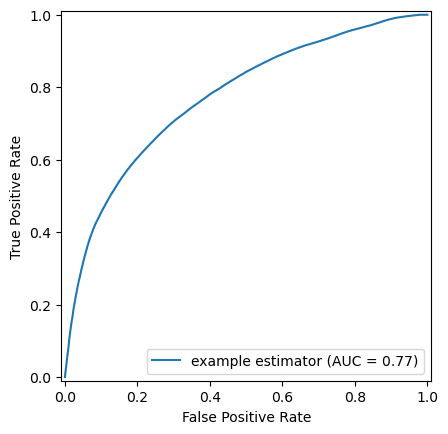

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)

model = create_model(0.1)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)



In [35]:
model.save('model_outputs/nn_dropout_01.keras')

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6827 - loss: 0.6216
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7688 - loss: 0.5458
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7715 - loss: 0.5338
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7887 - loss: 0.4836
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7896 - loss: 0.4801
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7903 - loss: 0.4788
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7915 - loss: 0.4770
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7905 - loss: 0.4778
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7921 - loss: 0.4751
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7921 - loss: 0.4752
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7923 - loss: 0.4753
Epoch 12/100
1352/1

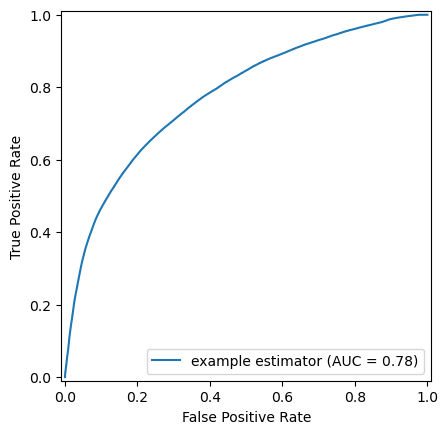

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)

model = create_model(0.2)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)


In [53]:
model.save('model_outputs/nn_dropout_02.keras')

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6884 - loss: 0.6064
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7963 - loss: 0.4921
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7976 - loss: 0.4746
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7990 - loss: 0.4678
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8010 - loss: 0.4644
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8027 - loss: 0.4622
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8027 - loss: 0.4592
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8029 - loss: 0.4589
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8028 - loss: 0.4565
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8025 - loss: 0.4562
43411/43411 ━━━━━━━━━━━━━━━━━━━━ 41s 934us/step

Classification Report (Training):
               precision  

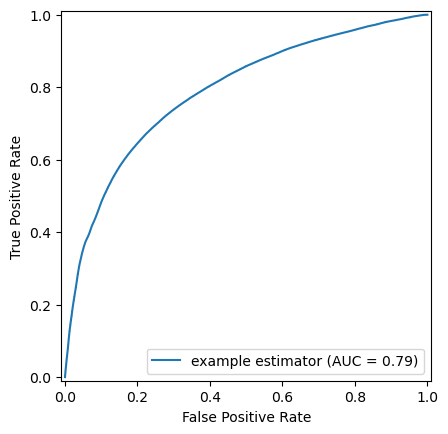

In [54]:
model = create_model(0.3)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)

In [55]:
model.save('model_outputs/nn_dropout_03.keras')

Looks like dropout rate of 0.1 seems to do best? Let's look at other hyperparameters.

In [ ]:
def create_model_():
    model = Sequential()
    model.add(Dense(30, activation = "relu", ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(25, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(20, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(4, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [2]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


This one will target batch size and epochs.

In [23]:
def create_model():
	model = Sequential()
	model.add(Dense(30, activation = "relu"))
	model.add(Dense(20, activation = "relu"))
	model.add(Dense(10, activation = "relu"))
	model.add(Dense(4, activation = "relu"))
	model.add(Dense(1, activation = "sigmoid"))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [26]:
seed = 5
tf.random.set_seed(seed)
model= KerasClassifier(model = create_model, n_outputs_expected_ = 1, verbose = 0)

batch_size = [10,20,40,60,80,100]
epochs = [25,50,75]

param_grid = dict(batch_size= batch_size, epochs=epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs= -1, cv=5)
grid_result= grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_12' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_13' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_14' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_15' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_16' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_17' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_18' has no defined outputs yet.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_19' has no defined outputs yet.


In [14]:
dill.dump_session('saved_notebook_env/neural_network.db')